In [2]:
import torch
from ResNet import ResNet
from trainer import Trainer
from torchvision.datasets import ImageFolder
from util import count_parameters, show, test
from torch.utils.data import random_split, DataLoader
from torchvision.transforms import Compose, Resize, Normalize, ToTensor

In [31]:
data_path = './datasets/animals10'

T = Compose([
    Resize((64,64)),
    ToTensor(),
    Normalize(mean=[.19,.19,.20],std=[.51,.50,.41]),
])

dataset = ImageFolder(data_path, transform=T)

train_set, val_set, test_set = random_split(dataset, [.6,.2,.2])
print(f'train: {len(train_set)}' + '\n' + f'valid: {len(val_set)}')
  
loaders = {
    'train': DataLoader(train_set, shuffle=True,  batch_size=64, drop_last=True),
    'val':   DataLoader(val_set,   shuffle=False, batch_size=64),
    'test':  DataLoader(test_set,  shuffle=False, batch_size=64)
}

train: 15708
valid: 5236


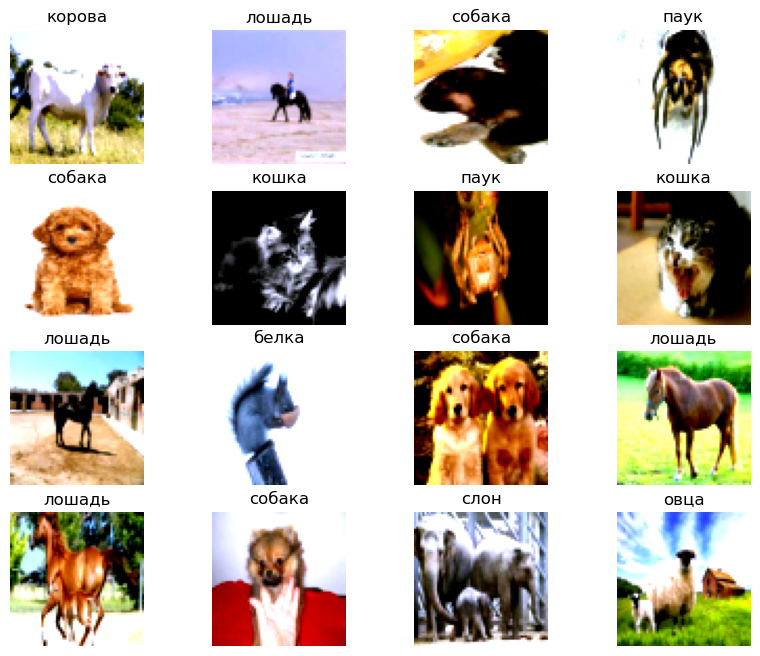

In [32]:
show(loaders['train'],4,4,dataset.classes)

In [33]:
model = ResNet(num_classes=10, num_blocks=[3,3,3], c_hidden=[32,64,128], dropout_prob=0.17)
count_parameters(model)

'1,084,394'

In [34]:
trainer = Trainer(model, loaders['train'], loaders['test'])
trainer.start(25)

Epoch: 1/25..  Train Loss: 2.025 Valid Loss: 2.639 Train Accuracy: 0.279 Valid Accuracy: 0.239
Epoch: 4/25..  Train Loss: 1.485 Valid Loss: 1.400 Train Accuracy: 0.484 Valid Accuracy: 0.511
Epoch: 7/25..  Train Loss: 1.210 Valid Loss: 1.337 Train Accuracy: 0.574 Valid Accuracy: 0.540
Epoch: 10/25..  Train Loss: 1.003 Valid Loss: 1.089 Train Accuracy: 0.643 Valid Accuracy: 0.635
Epoch: 13/25..  Train Loss: 0.826 Valid Loss: 1.068 Train Accuracy: 0.702 Valid Accuracy: 0.653
Epoch: 16/25..  Train Loss: 0.637 Valid Loss: 0.749 Train Accuracy: 0.759 Valid Accuracy: 0.759
Epoch: 19/25..  Train Loss: 0.500 Valid Loss: 0.797 Train Accuracy: 0.799 Valid Accuracy: 0.764
Epoch: 22/25..  Train Loss: 0.385 Valid Loss: 1.039 Train Accuracy: 0.838 Valid Accuracy: 0.712
Epoch: 25/25..  Train Loss: 0.329 Valid Loss: 0.936 Train Accuracy: 0.853 Valid Accuracy: 0.745


In [36]:
model = ResNet(num_classes=10, num_blocks=[3,3,3], c_hidden=[32,64,128], dropout_prob=0.33)
model.to(torch.device('mps'))
model.load_state_dict(torch.load('./checkpoint.pth'))

trainer.model = model
trainer.optimizer= torch.optim.AdamW(model.parameters(), lr=1e-4, weight_decay=2e-1)

In [37]:
trainer.start(7, clear=False)

Epoch: 1/7..  Train Loss: 0.623 Valid Loss: 0.679 Train Accuracy: 0.708 Valid Accuracy: 0.796
Epoch: 4/7..  Train Loss: 0.545 Valid Loss: 0.674 Train Accuracy: 0.727 Valid Accuracy: 0.795
Epoch: 7/7..  Train Loss: 0.516 Valid Loss: 0.684 Train Accuracy: 0.735 Valid Accuracy: 0.793


In [39]:
trainer.optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
trainer.start(7, clear=False)

Epoch: 1/7..  Train Loss: 0.516 Valid Loss: 0.674 Train Accuracy: 0.732 Valid Accuracy: 0.798
Epoch: 4/7..  Train Loss: 0.511 Valid Loss: 0.676 Train Accuracy: 0.734 Valid Accuracy: 0.798
Epoch: 7/7..  Train Loss: 0.501 Valid Loss: 0.684 Train Accuracy: 0.741 Valid Accuracy: 0.793


In [40]:
trainer.optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
trainer.start(4, clear=False)

Epoch: 1/4..  Train Loss: 0.506 Valid Loss: 0.679 Train Accuracy: 0.739 Valid Accuracy: 0.797
Epoch: 4/4..  Train Loss: 0.490 Valid Loss: 0.686 Train Accuracy: 0.745 Valid Accuracy: 0.798


In [42]:
model = ResNet(num_classes=10, num_blocks=[3,3,3], c_hidden=[32,64,128], dropout_prob=0.1)
model.to(torch.device('mps'))
model.load_state_dict(torch.load('./checkpoint.pth'))

trainer.model = model
trainer.optimizer= torch.optim.Adam(model.parameters())
trainer.start(7, clear=False)

Epoch: 1/7..  Train Loss: 0.290 Valid Loss: 1.026 Train Accuracy: 0.894 Valid Accuracy: 0.731
Epoch: 4/7..  Train Loss: 0.194 Valid Loss: 1.092 Train Accuracy: 0.920 Valid Accuracy: 0.739
Epoch: 7/7..  Train Loss: 0.191 Valid Loss: 1.057 Train Accuracy: 0.919 Valid Accuracy: 0.758


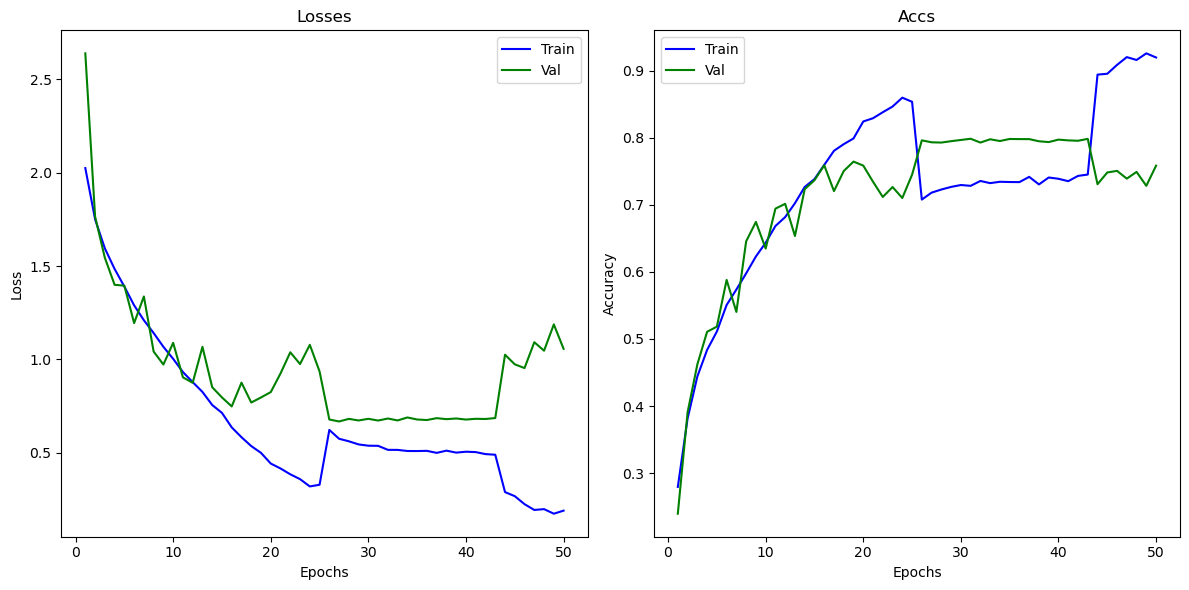

In [43]:
trainer.plot_history()

In [44]:
model.load_state_dict(torch.load('./checkpoint.pth'))
trainer.model.load_state_dict(torch.load('./checkpoint.pth'))

<All keys matched successfully>

In [45]:
trainer.validate(loaders['val'])

(0.6590452597635549, 0.7972121245977355)

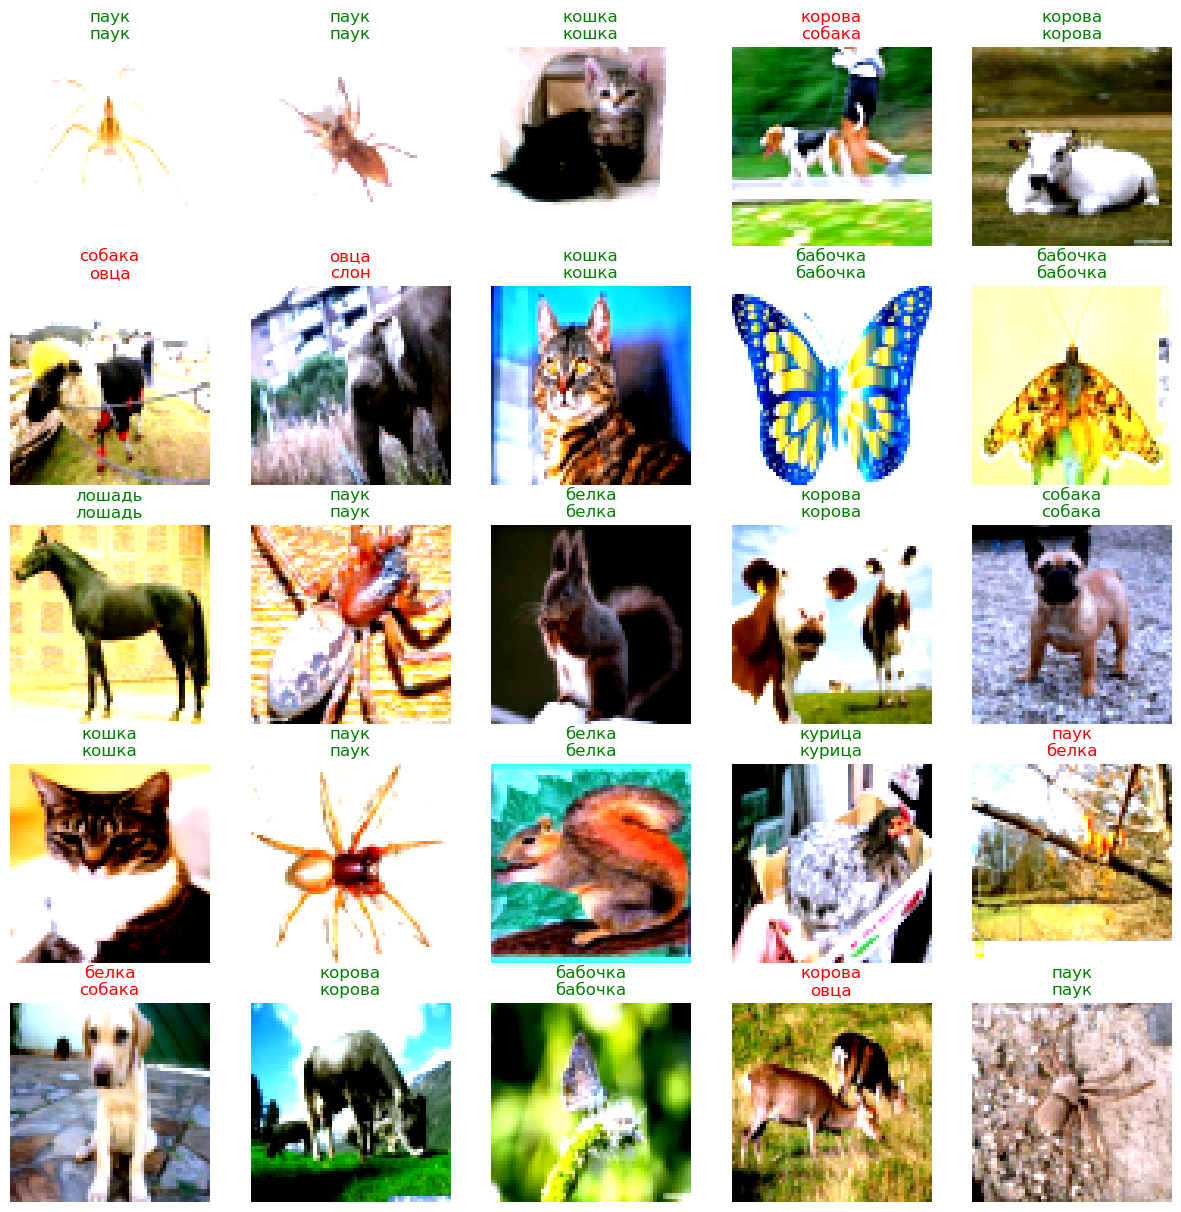

In [55]:
test(model, loaders['val'], dataset.classes)